# Предварительная обработка признаков для датасета.

- первичная загрузка датасета  
- визуализация признаков
- первичная обработка признаков
-- анализ числовых признаков
-- анализ категориальных признаков

In [1]:
import pandas as pd
import numpy as np

In [2]:
import importlib

In [3]:
import pickle

In [181]:
pd.options.mode.chained_assignment = None

In [115]:
!pip install ipynb

You should consider upgrading via the 'C:\Users\ПК\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_theme(style="whitegrid")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import xgboost

In [9]:
import catboost

In [318]:
from ipynb.fs.full import process_functions as func

In [319]:
importlib.reload(func)

<module 'ipynb.fs.full.process_functions' (D:\Learning\GeekBrains\_Final Project\process_functions.ipynb)>

## Работа с датасетом

In [12]:
df_macro = pd.read_pickle('macroeconomic.pkl')

In [13]:
df = pd.read_csv('project_data/attempt_4/train.csv')

In [14]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [15]:
df.shape

(30471, 292)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [17]:
empty_fields = df.isna().sum()
empty_fields

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [18]:
empty_fields = pd.DataFrame(empty_fields, columns=['number'])
empty_fields.head()

,number
id,0
timestamp,0
full_sq,0
life_sq,6383
floor,167


In [19]:
empty_fields = empty_fields[empty_fields['number']>0]
empty_fields.shape

(51, 1)

In [20]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [20]:
dataset_columns = df.columns

разобъем датасет на категориальные и цифровые признаки

Разобъем колонки на несколько групп.  
Категориальные и числовые признаки будут обрабатываться отдельно по разным правилам.  
так же отдельной группой будут выделены признаки, которые могут иметь только дискретные значения.

In [21]:
num_columns_main = ['full_sq','life_sq', 'floor', 'max_floor', 'num_room', 'kitch_sq' ]

In [22]:
num_columns_extra = ['full_all' 'male_f' 'female_f', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 
                     'children_preschool', 'preschool_quota', 'preschool_education_centers_raion',  'children_school',
                     'school_quota', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 
                     'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 
                     'shopping_centers_raion', 'office_raion',   'young_all',   'young_male',  'young_female'
                     'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all',
                     '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male',
                     '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female',
                     'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame',
                     'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag',
                     'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920',
                     'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995',
                     'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km',
                     'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km',
                     'railroad_station_walk_km', 'railroad_station_walk_min', 'railroad_station_avto_km',
                     'railroad_station_avto_min', 'public_transport_station_km', 'public_transport_station_min_walk',
                     'water_km',  'mkad_km',  'ttk_km',  'sadovoe_km',  'bulvar_ring_km',  'kremlin_km',  'big_road1_km',
                     'big_road2_km',  'railroad_km',   'zd_vokzaly_avto_km',  'bus_terminal_avto_km',  'oil_chemistry_km',
                     'nuclear_reactor_km', 'radiation_km',  'power_transmission_line_km',  'thermal_power_plant_km',
                     'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
                     'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km',
                     'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km',
                     'big_church_km', 'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km',
                     'catering_km',  'green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500',
                     'trc_count_500', 'trc_sqm_500', 'cafe_count_500', 'cafe_sum_500_min_price_avg',
                     'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500',
                     'cafe_count_500_price_1000', 'cafe_count_500_price_1500', 'cafe_count_500_price_2500',
                     'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'big_church_count_500',
                     'church_count_500', 'mosque_count_500', 'leisure_count_500', 'sport_count_500', 'market_count_500',
                     'green_part_1000', 'prom_part_1000', 'office_count_1000', 'office_sqm_1000', 'trc_count_1000',
                     'trc_sqm_1000', 'cafe_count_1000', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg',
                     'cafe_avg_price_1000', 'cafe_count_1000_na_price', 'cafe_count_1000_price_500',
                     'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500',
                     'cafe_count_1000_price_4000', 'cafe_count_1000_price_high', 'big_church_count_1000', 'church_count_1000',
                     'mosque_count_1000', 'leisure_count_1000', 'sport_count_1000', 'market_count_1000', 'green_part_1500',
                     'prom_part_1500',  'office_count_1500',  'office_sqm_1500', 'trc_count_1500', 'trc_sqm_1500',
                     'cafe_count_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500',
                     'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000',
                     'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000',
                     'cafe_count_1500_price_high', 'big_church_count_1500', 'church_count_1500', 'mosque_count_1500',
                     'leisure_count_1500', 'sport_count_1500', 'market_count_1500', 'green_part_2000', 'prom_part_2000',
                     'office_count_2000', 'office_sqm_2000', 'trc_count_2000', 'trc_sqm_2000', 'cafe_count_2000',
                     'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000',
                     'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000',
                     'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000',
                     'cafe_count_2000_price_high', 'big_church_count_2000', 'church_count_2000', 'mosque_count_2000',
                     'leisure_count_2000', 'sport_count_2000', 'market_count_2000', 'green_part_3000', 'prom_part_3000',
                     'office_count_3000', 'office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'cafe_count_3000',
                     'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000',
                     'cafe_count_3000_na_price', 'cafe_count_3000_price_500', 'cafe_count_3000_price_1000',
                     'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000',
                     'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'mosque_count_3000',
                     'leisure_count_3000', 'sport_count_3000', 'market_count_3000', 'green_part_5000', 'prom_part_5000',
                     'office_count_5000', 'office_sqm_5000', 'trc_count_5000', 'trc_sqm_5000', 'cafe_count_5000',
                     'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000',
                     'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000',
                     'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
                     'cafe_count_5000_price_high', 'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
                     'leisure_count_5000', 'sport_count_5000', 'market_count_5000',]

In [23]:
cat_columns_main = ['material', 'build_year',  'state',  'product_type',  'sub_area']

In [92]:
cat_columns_extra = ['preschool_education_centers_raion', 'school_education_centers_top_20_raion', 
                     'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 
                     'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 
                     'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 
                     'ID_metro', 'ID_railroad_station_walk',  'ID_railroad_station_avto',  'ecology', 
                     'water_1line', 'big_road1_1line', 'ID_big_road2', 'railroad_1line']

In [25]:
extra_columns = ['id', 'timestamp', ]

In [26]:
target_variable = ['price_doc']

В случае отсутствия каких-либо полей в дополнительном сете признаковзаполнение NaN величин будет выполнятся при помощи среднего по району  'sub_area'  
Выбросы в дополнительных признаках обрабатываться на предварительном  этапе не будут.  
Выбросы в основных признаках будут обрабатываться - заведомо невозможные величины будут исключены.
Год постройки будет приведен к четырехзначному формату  
Основные категориальные признаки будут обработаны отдельно.  

In [89]:
df.columns.to_list()

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

### Анализ признаков по отдельности для каждого из типов признаков.

#### Анализ числовых признаков

Параллельно с анализом признаков имеет смысл определять выбросы.  
Если соличество значений, которые являются выбросами сравнительно невелико (меньше одного процента от датасета, то имеет смысл удалять такие значения для тренировочного датасета).
По результататм анализа данных будут 

In [27]:
len(num_columns_main)

6

In [28]:
len(num_columns_extra)

253

Признаки с обозачением extra - большей частью статистические признаки. Дополнительный анализ статистических признаков будет осуществляться отдельно.

выведем статистику для основных признаков:

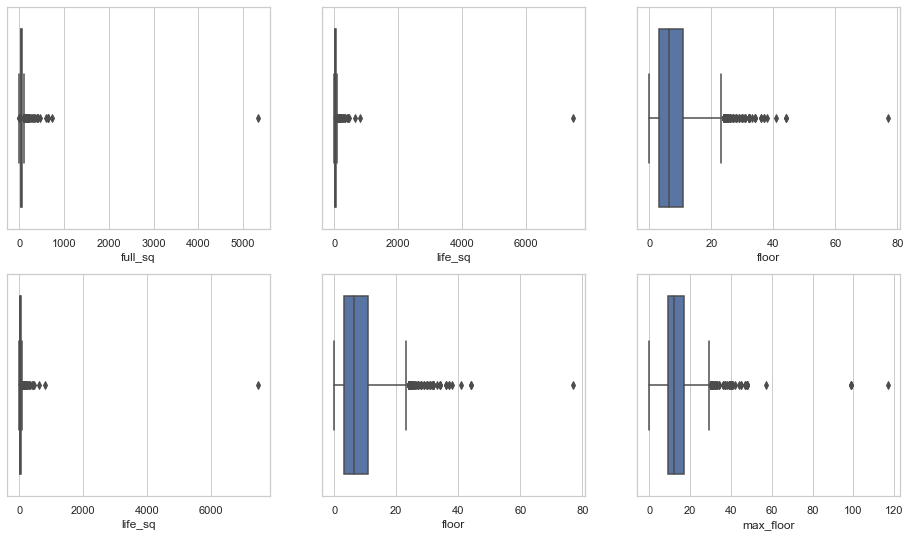

In [30]:
num_list_next = num_columns_main
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
for i in range(2):    
    for j in range (3):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])    

In [32]:
df[num_columns_main].describe()

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,20899.000000
mean,54.214269,34.403271,7.670803,12.558974,1.909804,6.399301
std,38.031487,52.285733,5.319989,6.756550,0.851805,28.265979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.000000
50%,49.000000,30.000000,6.500000,12.000000,2.000000,6.000000
75%,63.000000,43.000000,11.000000,17.000000,2.000000,9.000000
max,5326.000000,7478.000000,77.000000,117.000000,19.000000,2014.000000


Выведем явно завышенные и заниженные значения.

Общая площадь

<AxesSubplot:>

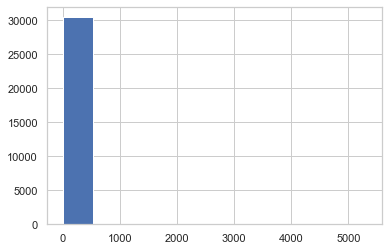

In [40]:
df['full_sq'].hist()

In [41]:
df[df['full_sq'] >= 1000]['full_sq'].count()

1

In [46]:
df[df['full_sq'] < 14]['full_sq'].count()

44

In [49]:
df[(df['full_sq'] <= 1000) & (df['full_sq'] >= 14)]['full_sq'].mean()

54.11184513245251

Жилая площадь

<AxesSubplot:>

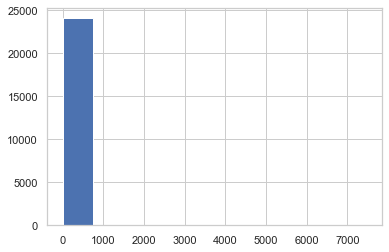

In [50]:
df['life_sq'].hist()

In [55]:
df[df['life_sq'] >= 750]['life_sq'].count()

2

In [56]:
df[df['life_sq'] < 1]['life_sq'].count()

45

In [57]:
df[(df['life_sq'] <= 750) & (df['life_sq'] >= 1)]['life_sq'].mean()

34.126117881951664

Площадь кухни

<AxesSubplot:>

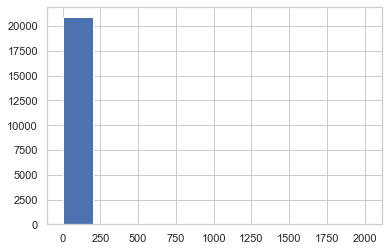

In [58]:
df['kitch_sq'].hist()

In [65]:
df[df['kitch_sq'] >= 100]['kitch_sq'].count()

9

In [66]:
df[(df['kitch_sq'] <= 750) & (df['kitch_sq'] >= 1)]['kitch_sq'].mean()

6.4450138362201495

Этаж, на котором расположена квартира

<AxesSubplot:>

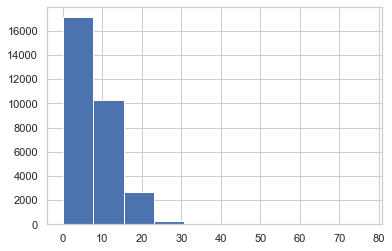

In [67]:
df['floor'].hist()

In [69]:
df[df['floor'] >= 40]['floor'].count()

4

In [70]:
df[df['floor'] < 1]['floor'].count()

9

In [71]:
round(df[(df['floor'] <= 40) & (df['floor'] >= 1)]['floor'].mean(), 0)

8.0

Количество  этажей в доме

<AxesSubplot:>

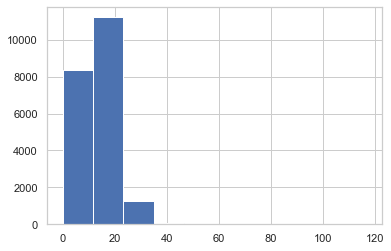

In [72]:
df['max_floor'].hist()

In [74]:
df[df['max_floor'] < 1]['max_floor'].count()

550

Количество комнат

<AxesSubplot:>

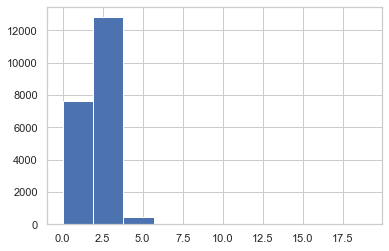

In [75]:
df['num_room'].hist()

In [76]:
df[df['num_room'] < 1]['num_room'].count()

14

In [80]:
round(df[(df['num_room'] >= 1 )]['num_room'].mean(), 0)

2.0

#### Первичый анализ категориальных признаков

In [81]:
len(cat_columns_main)

5

In [82]:
cat_columns_main

['material', 'build_year', 'state', 'product_type', 'sub_area']

Проверка количества nan значений:

In [93]:
df[cat_columns_main].isna().sum()

material         9572
build_year      13605
state           13559
product_type        0
sub_area            0
dtype: int64

In [99]:
df['state'].mode()

0    2.0
dtype: float64

In [100]:
df['material'].mode()

0    1.0
dtype: float64

In [109]:
df[df['build_year']<1000 ]['build_year'].unique()

array([  0.,   1.,   3.,  20., 215.,  71.])

In [94]:
df[cat_columns_extra].isna().sum()

preschool_education_centers_raion         0
school_education_centers_top_20_raion     0
culture_objects_top_25                    0
thermal_power_plant_raion                 0
incineration_raion                        0
oil_chemistry_raion                       0
radiation_raion                           0
railroad_terminal_raion                   0
big_market_raion                          0
nuclear_reactor_raion                     0
detention_facility_raion                  0
ID_metro                                  0
ID_railroad_station_walk                 25
ID_railroad_station_avto                  0
ecology                                   0
water_1line                               0
big_road1_1line                           0
ID_big_road2                              0
railroad_1line                            0
dtype: int64

In [96]:
df['ID_railroad_station_walk'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123.,  nan, 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133.])

### Анализ целевой переменой

In [119]:
df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

<AxesSubplot:xlabel='price_doc', ylabel='Count'>

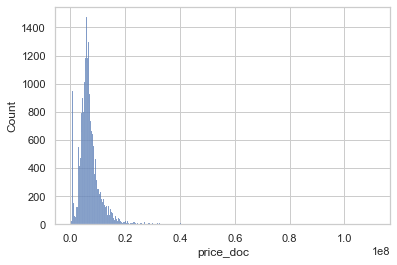

In [120]:
sns.histplot(data=df['price_doc'])

<AxesSubplot:>

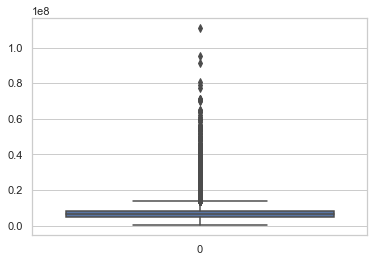

In [121]:
sns.boxplot(data=df['price_doc'])

Рспределение целевой переменной неисимметричное.

### Применение выбраных методов обработки к датасету.

In [320]:
df.shape

(30471, 292)

In [321]:
X, y = func.process(df, 'train')

In [322]:
X.shape

(30471, 288)

In [323]:
y.shape

(30471,)

In [324]:
X.head()

,full_sq,life_sq,floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,43,27.0,4.0,1.0,2014.0,2.0,6.019048,2.0,Investment,Bibirevo,...,40,9,4,0,13,22,1,0,52,4
1,34,19.0,3.0,1.0,2014.0,2.0,6.019048,2.0,Investment,Nagatinskij Zaton,...,36,15,3,0,15,29,1,10,66,14
2,43,29.0,2.0,1.0,2014.0,2.0,6.019048,2.0,Investment,Tekstil'shhiki,...,25,10,3,0,11,27,0,4,67,10
3,89,50.0,9.0,1.0,2014.0,2.0,6.019048,2.0,Investment,Mitino,...,15,11,2,1,4,4,0,0,26,3
4,77,77.0,4.0,1.0,2014.0,2.0,6.019048,2.0,Investment,Basmannoe,...,552,319,108,17,135,236,2,91,195,14


In [325]:
y.head(5)

0     5850000
1     6000000
2     5700000
3    13100000
4    16331452
Name: price_doc, dtype: int64

In [62]:
#df_date = pd.read_pickle('macroeconomic.pkl')

In [63]:
#df_complete = X.merge(df_date, how='left', left_on='timestamp', right_on='timestamp')

In [64]:
#df_complete.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,students_state_oneshift,provision_nurse,load_on_doctors,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,seats_theather_rfmin_per_100000_cap,population_reg_sports_share,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
1,2,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
2,3,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
3,4,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,30.63,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
4,5,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,30.63,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0


<bound method DataFrame.info of           id   timestamp  full_sq    life_sq  floor  max_floor  material  \
0          1  2011-08-20       43  27.000000    4.0        NaN       1.0   
1          2  2011-08-23       34  19.000000    3.0        NaN       1.0   
2          3  2011-08-27       43  29.000000    2.0        NaN       1.0   
3          4  2011-09-01       89  50.000000    9.0        NaN       1.0   
4          5  2011-09-05       77  77.000000    4.0        NaN       1.0   
...      ...         ...      ...        ...    ...        ...       ...   
30466  30469  2015-06-30       44  27.000000    7.0        9.0       1.0   
30467  30470  2015-06-30       86  59.000000    3.0        9.0       2.0   
30468  30471  2015-06-30       45  34.126118   10.0       20.0       1.0   
30469  30472  2015-06-30       64  32.000000    5.0       15.0       1.0   
30470  30473  2015-06-30       43  28.000000    1.0        9.0       1.0   

       build_year  num_room   kitch_sq  ...  cafe_count

In [65]:
#df_complete.shape

(30471, 339)

In [326]:
X.isna().sum()

full_sq               0
life_sq               0
floor                 0
material              0
build_year            0
                     ..
church_count_5000     0
mosque_count_5000     0
leisure_count_5000    0
sport_count_5000      0
market_count_5000     0
Length: 288, dtype: int64

In [ ]:
#X_train, X_valid, y_train, y_valid = train_test_split(df_complete, y, test_size = 0.33, random_state = 33)

In [327]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 33)

In [328]:
y_train.shape

(20415,)

In [329]:
cat_features = cat_columns_extra + cat_columns_main

In [331]:
model = catboost.CatBoostRegressor(iterations = 2000,
                          depth = 7,
                          cat_features = cat_features)

In [332]:
model.fit(X_train, y_train)

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=3]=2.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [115]:
len(model.feature_importances_)

291

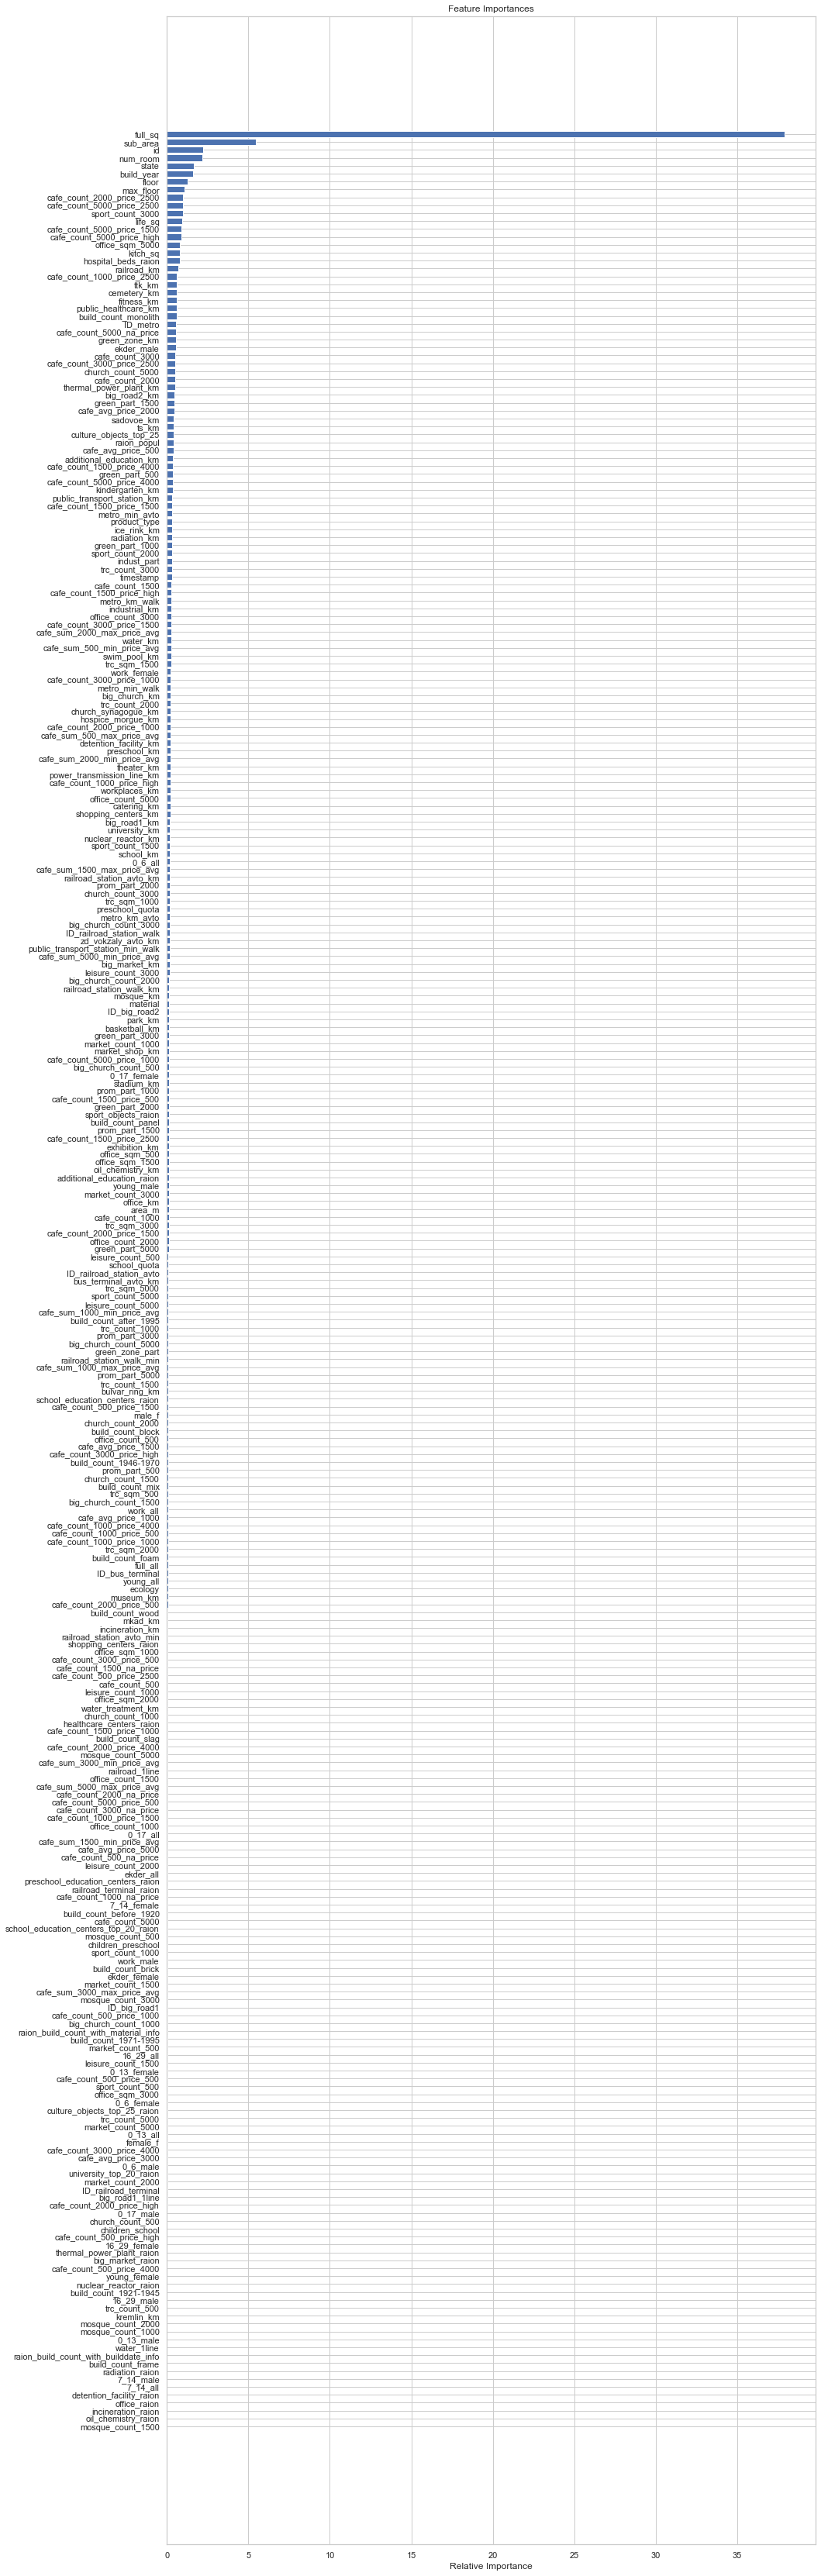

In [116]:

features= X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [104]:
importances

array([1.92801392e-01, 7.31535811e-02, 3.50955936e+01, 8.70800146e-01,
       1.39415518e+00, 7.34109379e-01, 3.04277516e-01, 1.79440036e+00,
       2.70721280e+00, 3.14022441e-01, 1.11618268e+00, 1.96576532e-01,
       2.22276157e-01, 2.39419777e-01, 4.20124933e-03, 1.04368942e-01,
       1.14362542e+00, 0.00000000e+00, 3.19270027e-01, 1.09579018e-02,
       1.06979084e-03, 3.67190092e-01, 4.21818178e-03, 1.65689337e-03,
       1.58014658e-01, 3.56950073e-01, 1.74442871e-02, 8.07094794e-03,
       6.85119686e-03, 1.49290178e+00, 4.99439698e-04, 1.56569785e-02,
       1.14992994e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.75075210e-02, 0.00000000e+00,
       0.00000000e+00, 3.05557182e-02, 2.68182421e-02, 0.00000000e+00,
       7.57131853e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.08897081e-02, 0.00000000e+00, 1.16460933e-03, 1.90830596e-01,
       8.73059489e-03, 0.00000000e+00, 0.00000000e+00, 1.67602179e-01,
      

In [117]:
file_name = 'preliminary_trained_model.pkl'

In [118]:
pickle.dump(model, open(file_name, 'wb'))